# Знакомство с SKlearn. Подготовка данных

In [18]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier as KNN

## sklearn

[Scikit-learn](https://sklearn.org/stable/index.html) (или сокращенно sklearn) — это самая популярная библиотека для классического машинного обучения на языке Python. Если Python — это «король» анализа данных, то sklearn — его главный рабочий инструмент.

Популярность `sklearn` держится на «трех китах»:
1. **Единый стандарт**: Все алгоритмы в библиотеке работают по одной и той же схеме: `model.fit()` (обучить) и `model.predict()` (предсказать) или `.transform()` (преобразовать). Выучив один метод, вы поймете, как работают сотни других.

2. **Огромное сообщество**: На любой вопрос по sklearn уже есть ответ на Stack Overflow или любая LLM-ка будет выдавать вам ответ с использованием `sklearn`

3. **Экосистема**: Она идеально работает в связке с другими библиотеками: `NumPy` (массивы), `Pandas` (таблицы) и `Matplotlib` (графики).


## 0. Cross-Validation (Кросс-валидация)

`Hold-out`: В обычном случае мы делим данные на две части: `обучение (train)` и `тест (test)`. Но что, если в тест попали «слишком легкие» примеры? Мы получим ложную уверенность в точности модели.

![alttext](../data/cv.webp)

`K-fold` решает эту проблему:
1. Данные разбиваются на частей (фолдов), например, на 10.

2. Модель обучается 10 раз. Каждый раз 9 частей используются для обучения, а 1 часть — для проверки.

3. В итоге мы получаем 10 разных оценок точности и берем среднее арифметическое. Это дает объективное понимание того, насколько хорошо модель работает на самом деле.

![alttext](../data/cv2.webp)

`Важно:` Под понятием `Cross-Validation (CV)` часто понимают именно метод `K-fold`

## 1. Preprocessing (Предобработка данных)

Предобработка данных (Preprocessing) — это, пожалуй, самый важный этап в машинном обучении. Есть золотое правило: **«Garbage in, garbage out» (Мусор на входе — мусор на выходе)**. Если скормить модели сырые, грязные данные, даже самый мощный алгоритм выдаст бесполезный результат.

Какие бывают шаги в Preprocessing? Теперь подробнее о них:

### 1. Масштабирование признаков (Scaling)
Приведение числовых данных к единому диапазону.

Рассмотрим такую ситуацию: у вас есть данные о дороге с 2мя признаками: `длина участка дороги` и `толщина слоя асфальта`. Обе величины даются в одной метрике - метры. И нам нужно бинарно классифицировать качество дороги: `хорошая`,`плохая`.



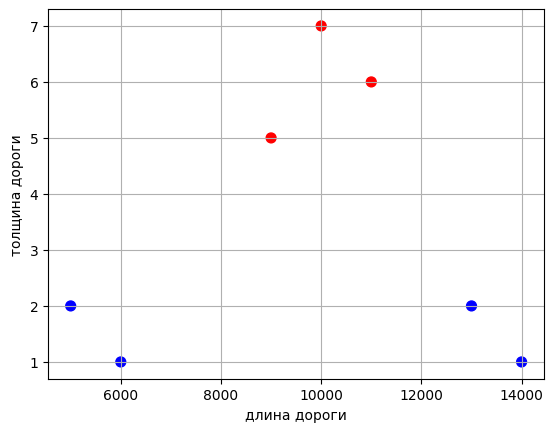

In [7]:
X = np.array([[10000, 7],[11000, 6],[9000, 5],[5000, 2],[6000, 1],[13000, 2],[14000, 1]])
y = np.array([1,1,1,0,0,0,0]) # 1 - хорошие, 0 - плохие
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', s=50, alpha=1)
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

Из логики нам будет очевидно, что первый признак практически бесполезен, а второй играет ключевую роль. Но, если запустить KNN или любой другой `метрический` алгоритм, мы получим обратную ситуацию, признак который в абсолюте больше - **важнее**, чем признак, который очень мало отличается.  

In [8]:
model = KNN(3)
model.fit(X,y)
X_bad = [[10000, 1]]
y_pred = model.predict(X_bad)
X_new = np.vstack([X, X_bad])
y_new = np.hstack([y, y_pred])

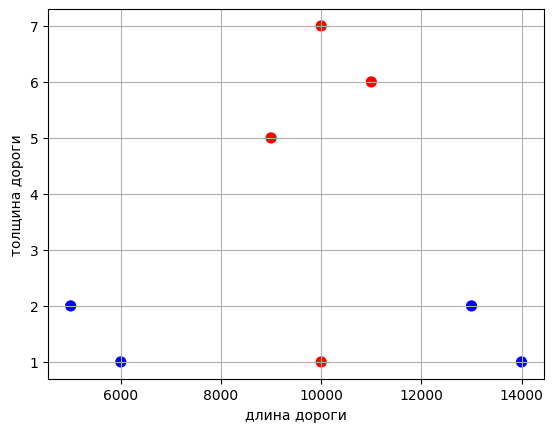

In [9]:
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, cmap='bwr', s=50, alpha=1)
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

Почему новая точка классифицировалась неправильно? Потому что, с точки зрения эвклидовой метрики, до `хороших` ей действительно `ближе`.

$$\rho((6000, 7), (10000, 1)) = \sqrt{(6000 - 10000)^2 + (7-1)^2} = \sqrt{6^2} << \rho((6000, 1), (10000, 1)) = \sqrt{4000^2 + (1-1)^2}$$

Чтобы справиться с этой проблемой важно `масштабировать` численные признаки, чтобы они были корректно сравнимы.

Есть разные подходы к масштабированию, например:
* Нормализация (MinMax Scaling) $$x^* = \frac{x-x_{min}}{x_{max} - x_{min}}$$
* Стандартизация (Standart Scaling) $$x^* = \frac{x-\mu}{\sigma}$$, где $\mu$ - среднее, а $\sigma$ - стандартное отклонение

Метод `fit` подбирает параметры масштабирования, а метод `transform` непосредственно преобразует значения. 

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

stan = StandardScaler().fit(X)
norm = MinMaxScaler().fit(X)
X_st = stan.transform(X)
X_norm = norm.transform(X)

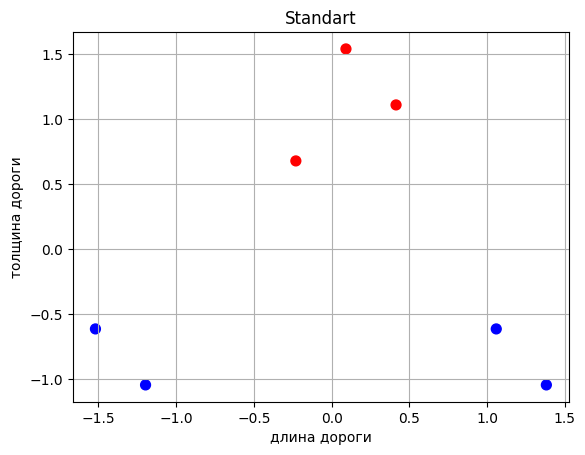

In [14]:
plt.scatter(X_st[:,0], X_st[:,1], c=y, cmap='bwr', s=50, alpha=1)
plt.title('Standart')
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

И вот теперь мы можем верно классифицировать данные, не забыв трансформировать точку, которую предсказываем

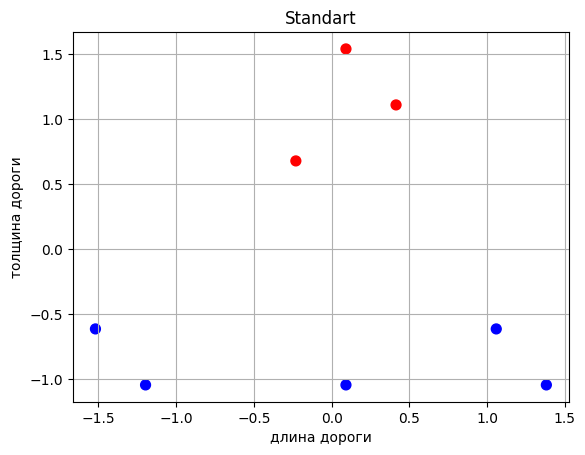

In [15]:
model = KNN(3)
model.fit(X_st,y)
X_bad = stan.transform([[10000, 1]])
y_pred = model.predict(X_bad)

X_new = np.vstack([X_st, X_bad])
y_new = np.hstack([y, y_pred])
plt.scatter(X_new[:,0], X_new[:,1], c=y_new, cmap='bwr', s=50, alpha=1)
plt.title('Standart')
plt.xlabel('длина дороги')
plt.ylabel('толщина дороги')
plt.grid()

### Почему важно делать `fit` на Train, а `transform` на Test?

Это критический момент для предотвращения **Data Leakage** (утечки данных).

1.  **Суть проблемы:** Если вычислять среднее (для масштабирования) по всем данным сразу, информация из будущего (теста) «просочится» в обучение. Модель покажет ложновысокий результат на тесте, но провалится в реальности.
2.  **Правильный алгоритм:**
    *   **`scaler.fit(X_train)`**: Вычисляем параметры (среднее, отклонение) только на обучающей выборке.
    *   **`scaler.transform(X_train)`**: Масштабируем трейн на основе этих параметров.
    *   **`scaler.transform(X_test)`**: Масштабируем тест, используя параметры, полученные от трейна!

> Мы делаем вид, что теста вообще не существует до самого момента предсказания.

### 2. Работа с пропущенными значениями (Imputation)
Большинство моделей `sklearn` выдадут ошибку, если встретят `NaN` (пустоты).

*   **Что делать?**
    *   Удалить строки с пропусками (если их очень мало).
    *   Заполнить пропуски средним, медианой или модой с помощью `SimpleImputer`.

In [19]:
from sklearn.impute import SimpleImputer


data = {
    'Возраст': [25, 30, np.nan, 40, 22, np.nan],
    'Зарплата': [50, np.nan, 70, 80, 45, 60],
    'Город': ['Москва', 'Питер', 'Москва', np.nan, 'Казань', 'Москва']
}
df = pd.DataFrame(data)
df


,Возраст,Зарплата,Город
0,25.0,50.0,Москва
1,30.0,NaN,Питер
2,NaN,70.0,Москва
3,40.0,80.0,NaN
4,22.0,45.0,Казань
5,NaN,60.0,Москва


Можно удалить строки с `NaN`ами с помощью знакомого нам `.dropna()`

In [20]:
df_dropped = df.dropna()
df_dropped

,Возраст,Зарплата,Город
0,25.0,50.0,Москва
4,22.0,45.0,Казань


А можно заполнить при через Sklearn (`SimpleImputer`)

In [ ]:
num_imputer = SimpleImputer(strategy='mean')
df[['Возраст', 'Зарплата']] = num_imputer.fit_transform(df[['Возраст', 'Зарплата']])

# Для категориальных данных (строк) используем самое частое значение (most_frequent)
# cat - от слова category не от слова 🐱!!!

cat_imputer = SimpleImputer(strategy='most_frequent')
df[['Город']] = cat_imputer.fit_transform(df[['Город']])

df

,Возраст,Зарплата,Город
0,25.00,50.0,Москва
1,30.00,61.0,Питер
2,29.25,70.0,Москва
3,40.00,80.0,Москва
4,22.00,45.0,Казань
5,29.25,60.0,Москва


### 3. Обработка выбросов (Outliers)
Выбросы — это аномалии (например, возраст 200 лет или цена квартиры в 10 рублей).

*   **Почему это опасно?** 

`Ответ` К, примеру линейные модели пытаются подстроиться под каждое значение. Один сильный выброс может «утянуть» линию регрессии на себя, испортив точность для всех остальных нормальных данных.

Как именно бороться с выбросами мы узнаем немного позже.

### 4. Обработка категориальных признаков
Компьютеры работают только с числами. Категориальные данные (текст) нужно «оцифровать».

*   **Label Encoding:** Присваивает каждой категории число (0, 1, 2...).
    *   *Проблема:* Модель может подумать, что категория №2 «больше» или «лучше», чем №1.
    *   *Когда использовать:* Для порядковых данных (например: `низкий`=0, `средний`=1, `высокий`=2).
    
*   **One-Hot Encoding:** Создает для каждой категории отдельную колонку с 0 и 1.
    *   *Зачем:* Чтобы убрать ложную иерархию (например, между городами или цветами).

In [23]:
df

,Возраст,Зарплата,Город
0,25.00,50.0,Москва
1,30.00,61.0,Питер
2,29.25,70.0,Москва
3,40.00,80.0,Москва
4,22.00,45.0,Казань
5,29.25,60.0,Москва


In [25]:
from sklearn.preprocessing import LabelEncoder


# LabelEncoder Подходит, если есть логический порядок (но для городов это риск)
le = LabelEncoder()
df_label = df.copy()
df_label['Город_label'] = le.fit_transform(df['Город'])
df_label

,Возраст,Зарплата,Город,Город_label
0,25.00,50.0,Москва,1
1,30.00,61.0,Питер,2
2,29.25,70.0,Москва,1
3,40.00,80.0,Москва,1
4,22.00,45.0,Казань,0
5,29.25,60.0,Москва,1


In [29]:
# Через Pandas

df_ohe = pd.get_dummies(df, columns=['Город'])
df_ohe

,Возраст,Зарплата,Город_Казань,Город_Москва,Город_Питер
0,25.00,50.0,False,True,False
1,30.00,61.0,False,False,True
2,29.25,70.0,False,True,False
3,40.00,80.0,False,True,False
4,22.00,45.0,True,False,False
5,29.25,60.0,False,True,False


In [30]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
ohe_transformed = ohe.fit_transform(df[['Город']])
# Превращаем результат обратно в красивый DataFrame
ohe_df = pd.DataFrame(ohe_transformed, columns=ohe.get_feature_names_out(['Город']))
df_final = pd.concat([df.drop('Город', axis=1), ohe_df], axis=1)
df_final

,Возраст,Зарплата,Город_Казань,Город_Москва,Город_Питер
0,25.00,50.0,0.0,1.0,0.0
1,30.00,61.0,0.0,0.0,1.0
2,29.25,70.0,0.0,1.0,0.0
3,40.00,80.0,0.0,1.0,0.0
4,22.00,45.0,1.0,0.0,0.0
5,29.25,60.0,0.0,1.0,0.0


### Промежуточный итог

Работа с scikit-learn требует строгого порядка действий. Главное правило: `модель не должна «видеть» тестовые данные во время обучения`, иначе предсказания будут нечестными (эффект «подглядывания»).

Вот пример строгого порядка действий, к примеру,  в задаче регрессии, «золотой стандарт» того, как выстраивается процесс:
1. Загрузка данных (pandas или datasets).
2. Обработка категориальных данных (кодируем текст в числовое представление).
3. Разделение на Train/Test (train_test_split).
4. Масштабирование (StandardScaler или MinMaxScaler) — приводим числа к единому масштабу.
`Важно:` Делаем fit только на обучающей выборке (train)!
5. Обучение модели (fit).
6. Предсказание (predict).
`Примечание:` В регрессии `predict_proba` не используется, так как мы предсказываем число, а не вероятность класса.


А вот тут небольшая шпаргалка по используемым методам:

* `fit(X, y)`: «Посмотри на данные и выучи закономерности» (у модели) или «вычисли среднее и отклонение» (у "скейлера").
* `transform(X)`: «Примени выученные правила к этим данным».
* `fit_transform(X)`: Сделать два действия сразу (делаем только для train!).
* `predict(X)`: «Выдай итоговый ответ (число или класс)».
* `predict_proba(X)`: «Выдай вероятность (например, 'объект похож на кота на 80%')». Используется только в классификации.

Мы до сих пор строим некоторый алгоритм $a: X \rightarrow Y$, приближающий истинную зависимость `y`. Иногда ответ алгоритма `a` обозначают так: $$\hat{y} = a(x, w)$$


## Конкретный пример

In [31]:
# 0. Импорт модулей
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


In [32]:
# 1. Загрузка данных
df = sns.load_dataset('tips')

# Это классический «игрушечный» датасет из библиотеки seaborn, который идеально подходит для обучения регрессии.
# В нем собраны данные о визитах в ресторан в США за несколько месяцев.

# Суть задачи: На основе параметров заказа предсказать, сколько чаевых (tip) оставит клиент.

In [33]:
# 2. Обработка категориальных данных (упрощенно через pandas для наглядности)
# Кодируем пол, день недели, время и курение
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

In [34]:
# 3. Разделение на Train/Test
X = df_encoded.drop('tip', axis=1)
y = df_encoded['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# 4. Масштабирование
scaler = StandardScaler()
# ВАЖНО: fit только на train!
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
# 5. Обучение модели
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
# 6. Предсказание
y_pred = model.predict(X_test_scaled)

print(f"Ошибка MAE: {mean_absolute_error(y_test, y_pred):.2f}")

Ошибка MAE: 0.67


### Что такое Pipeline?

`Pipeline` — это «конвейер» в sklearn, который объединяет преобразование данных и обучение модели в один объект.
Зачем он нужен?

1. Защита от утечки данных (Data Leakage): Пайплайн гарантирует, что масштабирование будет рассчитано только на тренировочных данных.
2. Удобство: Вам не нужно вручную применять `scaler.transform` к новым данным — вы просто вызываете `pipeline.predict(новые_данные)`, и данные сами проходят через все шаги трансформации.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 1. Загрузка данных
df = sns.load_dataset('tips')
X = df.drop('tip', axis=1)
y = df['tip']

# Разделяем до всякой обработки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Описываем препроцессинг (какие колонки как обрабатывать)
numeric_features = ['total_bill', 'size']
categorical_features = ['sex', 'smoker', 'day', 'time']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# 3. Собираем Pipeline: сначала препроцессинг, потом модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# 4. Обучаем ВСЁ одной командой (fit сам сделает трансформации внутри)
model_pipeline.fit(X_train, y_train)

# 5. Предсказание (просто передаем "сырые" данные)
y_pred = model_pipeline.predict(X_test)

print(f"Ошибка MAE через Pipeline: {mean_absolute_error(y_test, y_pred):.2f}")


Ошибка MAE через Pipeline: 0.67


В pipeline удобно добавлять новую модель на очередном шаге или создать два разных pipelines

In [39]:
from sklearn.tree import DecisionTreeRegressor

# 1. Берем препроцессор из предыдущего шага
# (Он уже знает, какие колонки масштабировать, а какие кодировать)

# 2. Создаем два разных пайплайна
# Пайплайн для Линейной Регрессии ()
pipe_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Пайплайн для Решающего Дерева
pipe_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(max_depth=5, random_state=42))
])

# 3. Обучаем обе модели
pipe_lr.fit(X_train, y_train)
pipe_dt.fit(X_train, y_train)

# 4. Сравниваем результаты
print(f"MAE Линейная регрессия: {mean_absolute_error(y_test, pipe_lr.predict(X_test)):.2f}")
print(f"MAE Решающее дерево: {mean_absolute_error(y_test, pipe_dt.predict(X_test)):.2f}")


MAE Линейная регрессия: 0.67
MAE Решающее дерево: 0.69


## Практика на паре:
Попробуйте выполнить сами. Если что-то непонятно, то спросите у преподавателя или у LLM. Но не просите готовый код



In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Загружаем данные
raw_data = load_breast_cancer()

# Создаем красивый DataFrame
df = pd.DataFrame(raw_data.data, columns=raw_data.feature_names)
df['target'] = raw_data.target  # 0: злокачественная, 1: доброкачественная

df.head()

In [ ]:
# Разделяем признаки и целевую переменную
X = df.drop(columns=['...']) # Удали целевую колонку, чтобы получить признаки
y = df['...']             # Выдели только целевую колонку

# ЗАДАНИЕ: Раздели на train/test (80% на 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=..., random_state=42)

# ЗАДАНИЕ: Создай Pipeline (Масштабирование + Модель)
model_pipeline = Pipeline([
    ('scaler', ...),
    ('clf', ...)
])

# ЗАДАНИЕ: Обучи модель на тренировочных данных
model_pipeline.fit(..., ...)

# ЗАДАНИЕ: Получи предсказания
y_pred = model_pipeline.predict(...)

# ЗАДАНИЕ: Получи вероятности (вспомни про метод для вероятностей!)
y_proba = model_pipeline.predict_proba(...)

# Проверка точности
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")